# Imports

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic lines
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

# Load clean data

In [3]:
filename = "all_games_2023-01_to_2024-06_all_cols.csv"
filepath = os.path.join("..","data", filename)
all_games_df = pd.read_csv(filepath)

In [4]:
all_games_df

,date,start_time,end_time,time_class,time_control,rated,rules,url,moves,opening_code,...,winner_pawns_count,loser_pawns_count,winner_pieces_only_count,loser_pieces_only_count,pieces_count_diff,pawns_count_diff,winner_material_ttl,loser_material_ttl,winner_pcs,loser_pcs
0,2023-01-07,2023-01-07 08:17:06,2023-01-07 14:35:53,daily,1/604800,True,chess,https://www.chess.com/game/daily/437377841,1. e4 {[%clk 158:31:38] 1... c6 {[%clk 163:21:...,B10,...,6,6,5,4,1,0,31,22,"['r', 'k', 'r', 'p', 'p', 'p', 'p', 'p', 'q', ...","['P', 'P', 'B', 'P', 'P', 'P', 'P', 'K', 'R', ..."
1,2023-01-14,2023-01-14 11:34:48,2023-01-14 15:09:28,daily,1/604800,True,chess,https://www.chess.com/game/daily/448245095,1. e4 {[%clk 167:35:57] 1... c5 {[%clk 165:23:...,B22,...,5,6,6,6,0,-1,33,34,"['r', 'q', 'r', 'b', 'b', 'p', 'k', 'p', 'p', ...","['B', 'Q', 'P', 'N', 'P', 'P', 'P', 'P', 'P', ..."
2,2023-01-30,2023-01-30 17:32:36,2023-01-30 07:50:02,daily,1/604800,True,chess,https://www.chess.com/game/daily/436095119,1. e4 {[%clk 167:38:55] 1... c6 {[%clk 163:21:...,B10,...,7,7,3,3,0,0,20,20,"['r', 'r', 'k', 'n', 'p', 'p', 'p', 'p', 'p', ...","['P', 'P', 'P', 'R', 'P', 'P', 'N', 'P', 'P', ..."
3,2023-01-30,2023-01-30 21:29:25,2023-01-30 21:39:52,blitz,300,True,chess,https://www.chess.com/game/live/68853253455,1. Nf3 {[%clk 0:04:54.9] 1... d5 {[%clk 0:04:5...,A09,...,0,0,1,0,1,0,9,0,"['K', 'Q']",['k']
4,2023-02-07,2023-02-07 20:18:19,2023-02-07 19:25:50,daily,1/604800,True,chess,https://www.chess.com/game/daily/472634081,1. c4 {[%clk 164:52:18] 1... e5 {[%clk 125:36:...,A21,...,8,8,7,7,0,0,39,39,"['r', 'n', 'b', 'q', 'k', 'n', 'r', 'p', 'p', ...","['P', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,2024-05-31,2024-05-31 12:33:22,2024-05-31 12:35:40,bullet,60,True,chess,https://www.chess.com/game/live/110898007115,1. e4 {[%clk 0:01:00] 1... d5 {[%clk 0:00:59.9...,B01,...,2,0,4,0,4,2,22,0,"['R', 'Q', 'N', 'P', 'P', 'K', 'N']",['k']
3204,2024-05-31,2024-05-31 12:35:50,2024-05-31 12:37:37,bullet,60,True,chess,https://www.chess.com/game/live/110898034915,1. e4 {[%clk 0:01:00] 1... e6 {[%clk 0:01:00] ...,C00,...,6,5,5,5,0,1,31,30,"['R', 'P', 'P', 'N', 'Q', 'P', 'B', 'P', 'P', ...","['r', 'q', 'r', 'k', 'p', 'b', 'p', 'p', 'p', ..."
3205,2024-05-31,2024-05-31 12:37:42,2024-05-31 12:39:28,bullet,60,True,chess,https://www.chess.com/game/live/110898057561,1. e4 {[%clk 0:01:00] 1... e5 {[%clk 0:01:00] ...,C50,...,5,5,2,2,0,0,19,15,"['r', 'k', 'p', 'p', 'p', 'p', 'p', 'q']","['P', 'P', 'P', 'P', 'P', 'R', 'R', 'K']"
3206,2024-05-31,2024-05-31 13:49:35,2024-05-31 13:51:50,bullet,60,True,chess,https://www.chess.com/game/live/110902287015,1. e4 {[%clk 0:01:00] 1... d5 {[%clk 0:01:00] ...,B01,...,4,4,3,0,3,0,21,4,"['Q', 'R', 'P', 'P', 'P', 'N', 'P', 'K']","['k', 'p', 'p', 'p', 'p']"


# Analyses

## Castling

In [14]:
castle_df = all_games_df[["user_castled", "opp_castled", "user_colour", "user_win"]]

castle_df = castle_df.query("user_win != 'DRAW'")
castle_df

castle_df.groupby("user_win").mean()

,user_castled,opp_castled
user_win,,
False,0.80517,0.801387
True,0.82984,0.750925


## Rating

In [25]:
all_games_df.columns

Index(['date', 'start_time', 'end_time', 'time_class', 'time_control', 'rated',
       'rules', 'url', 'moves', 'opening_code', 'opening_name',
       'white_username', 'black_username', 'white_clock', 'black_clock',
       'white_rating', 'black_rating', 'result', 'white_result',
       'black_result', 'higher_rated_colour', 'winner', 'winner_rating_diff',
       'user_rating_diff', 'user_win', 'user_colour', 'move_numbers',
       'white_moves', 'black_moves', 'w_cstl_side', 'w_cstl_move',
       'b_cstl_side', 'b_cstl_move', 'user_castled', 'opp_castled',
       'final_position_fen', 'winner_ttl_pieces_count',
       'loser_ttl_pieces_count', 'winner_pawns_count', 'loser_pawns_count',
       'winner_pieces_only_count', 'loser_pieces_only_count',
       'pieces_count_diff', 'pawns_count_diff', 'winner_material_ttl',
       'loser_material_ttl', 'winner_pcs', 'loser_pcs'],
      dtype='object')

In [27]:
rating_cols = ['white_rating', 'black_rating', 'result', 'white_result',
       'black_result', 'higher_rated_colour', 'winner', 'winner_rating_diff',
       'user_rating_diff', 'user_win', 'user_colour', 'time_class']
rating_df = all_games_df[rating_cols]

In [28]:
rating_df

,white_rating,black_rating,result,white_result,black_result,higher_rated_colour,winner,winner_rating_diff,user_rating_diff,user_win,user_colour,time_class
0,1298,1461,0-1,checkmated,win,black,black,163,163,True,black,daily
1,1429,1234,0-1,timeout,win,white,black,-195,195,False,white,daily
2,1427,1449,0-1,timeout,win,black,black,22,22,True,black,daily
3,1022,1030,1-0,win,timeout,black,white,-8,8,False,black,blitz
4,1584,1449,1/2-1/2,agreed,agreed,white,DRAW,-135,-135,False,black,daily
...,...,...,...,...,...,...,...,...,...,...,...,...
3203,1356,1350,1-0,win,checkmated,white,white,6,-6,False,black,bullet
3204,1358,1360,1-0,win,timeout,black,white,-2,-2,True,white,bullet
3205,1350,1347,0-1,checkmated,win,white,black,-3,3,False,white,bullet
3206,1356,1342,1-0,win,checkmated,white,white,14,-14,False,black,bullet


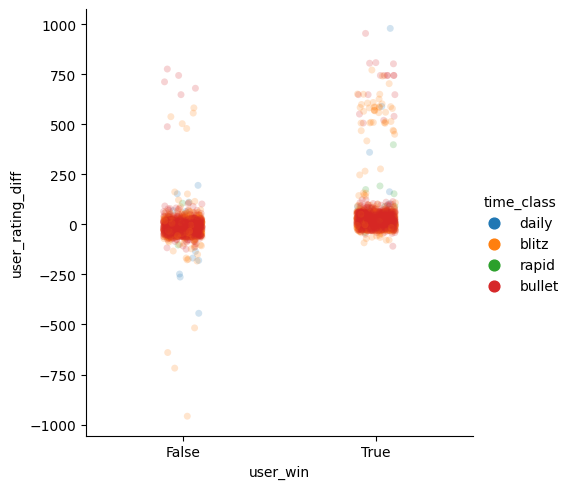

In [29]:
sns.catplot(y="user_rating_diff", x="user_win", data=rating_df, alpha=0.2, hue="time_class")

In [11]:
all_games_df.columns#.moves#.map(lambda x: len(x))

Index(['date', 'start_time', 'end_time', 'time_class', 'time_control', 'rated',
       'rules', 'url', 'moves', 'opening_code', 'opening_name',
       'white_username', 'black_username', 'white_clock', 'black_clock',
       'white_rating', 'black_rating', 'result', 'white_result',
       'black_result', 'higher_rated_colour', 'winner', 'winner_rating_diff',
       'user_rating_diff', 'user_win', 'user_colour', 'move_numbers',
       'white_moves', 'black_moves', 'w_cstl_side', 'w_cstl_move',
       'b_cstl_side', 'b_cstl_move', 'user_castled', 'opp_castled',
       'final_position_fen', 'winner_ttl_pieces_count',
       'loser_ttl_pieces_count', 'winner_pawns_count', 'loser_pawns_count',
       'winner_pieces_only_count', 'loser_pieces_only_count',
       'pieces_count_diff', 'pawns_count_diff', 'winner_material_ttl',
       'loser_material_ttl', 'winner_pcs', 'loser_pcs'],
      dtype='object')

In [22]:
all_games_df['number_of_moves'] = all_games_df.move_numbers.map(lambda x : int(len(x)/2))

In [26]:
all_games_df['user_win']

0        True
1       False
2        True
3       False
4       False
        ...  
3203    False
3204     True
3205    False
3206    False
3207    False
Name: user_win, Length: 3208, dtype: bool

ValueError: Could not interpret value `user_win` for parameter `hue`

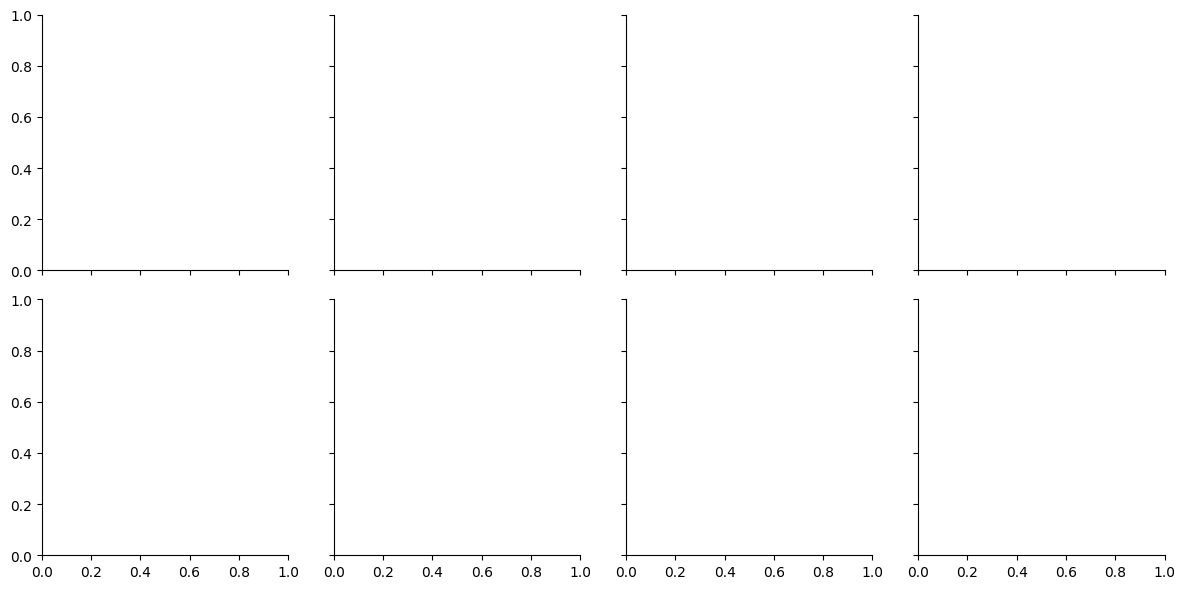

In [38]:
grid = sns.FacetGrid(all_games_df, col='time_class', row='user_colour')
grid.map(sns.scatterplot, "user_rating_diff", "number_of_moves", alpha=0.2, hue="user_win", hue_order=[True,False])
grid.set(xlim=(-150,150))